# Final Project

Data From Kaggle https://www.kaggle.com/madhansing/bank-loan2 by Madhan singh

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

Next Question, is there any oportunity for Fintech Company to gain more customer From The data?
We need to identify the customers segments, so that they can specifically target these customers. 

## Data Detail
- Loan_ID              
- Gender (Male/Female)               
- Married (Yes/No)              
- Dependents (Number of dependents : 0,1,2,3+)         
- Education (Graduate / Not Graduate           
- Self_Employed (Yes / No)      
- ApplicantIncome      
- CoapplicantIncome   
- LoanAmount (Loan amount in thousands)          
- Loan_Amount_Term (Term of loan in Month)   
- Credit_History (credit history meets guidelines)       
- Property_Area (Urban/ Semi Urban/ Rural)      
- Loan_Status (Loan approved (Y/N))

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# membaca dataset 
loanData = pd.read_csv("madfhantr.csv")     

In [3]:
loanData

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [4]:
#Meperhatikan data type
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loanData.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [6]:
loanData.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

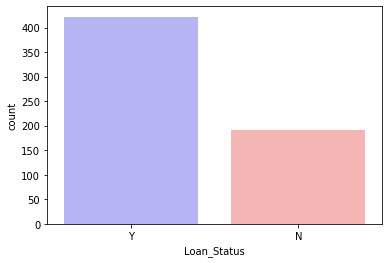

In [7]:
sns.countplot(x="Loan_Status", data=loanData, palette="bwr")
plt.show()

## Divide data in 2, categorical and numerical

In [8]:
loanData.drop(columns=['Loan_ID']) ## Dropping Loan ID

categorical= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical)

numerical= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


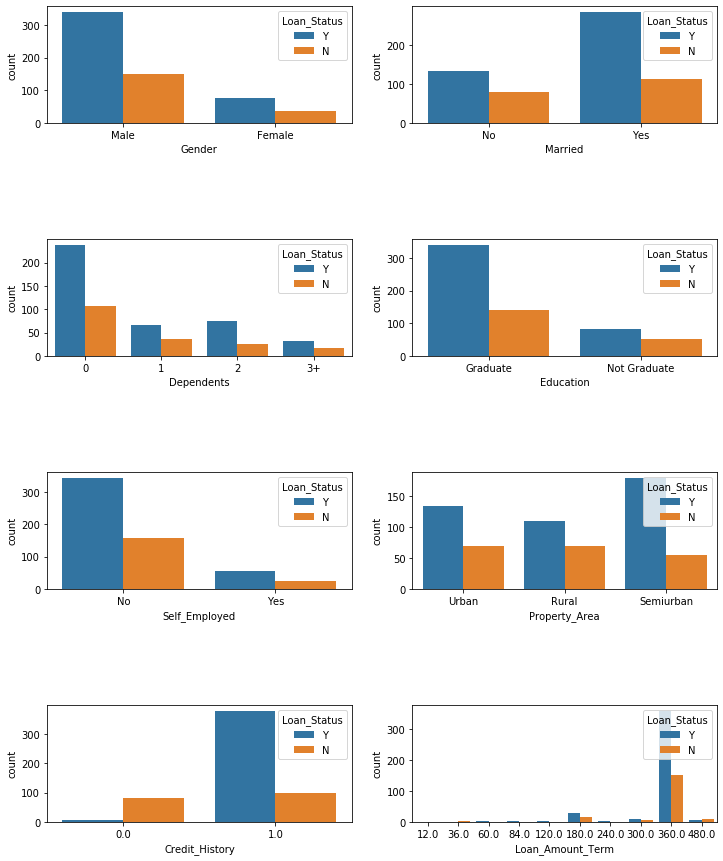

In [9]:
### Loan Data Visualization libraries

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loanData,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

## Analisa Visualisasi

Dari data diatas di dapatkan:
1. Aplicant dengan status **Gender** = Male, lebih banyak mengajukan 'Home loan' dan juga lebih banyak di acc
2. Aplicant dengan status **Married** = Yes, leiih banyak mengajukan 'Home loan' dan juga lebih banyak di acc
3. Aplicant yang tidak memiliki **Dependent** lebih banyak mengajukan 'Home Loan' dan lebih banyak di acc
4. Aplicant dengan status **Education** = Graduate, lebih banyak mengajukan 'Home Loan' dan lebih banyak di acc
5. Aplicant dengan status **Self_Employed** = No, lebih banyak mengajukan 'Home Loan' dan lebih banyak di acc
6. Pengajukan 'Home loan' terbagi cukup rata di 3 **Property_Area**, tapi terlihat Pengajukan 'Home loan' di area Semiurban lebih banyak.
7. Aplicant dengan status **Credit_History** = 1(Memiliki Credit History), lebih banyak mengajukan 'Home Loan' dan lebih banyak di acc, sedangkan belum memiliki Credit History lebih banyak tidak di acc.
8. Aplicant paling banyak mengajukan 'Home Loan' dengan **Loan_Amount_Term** = 360 month (30 tahun)

# Cleaning Data

### Handling Null Value

In [10]:
loanData.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Gender Null Values

In [11]:
loanData['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

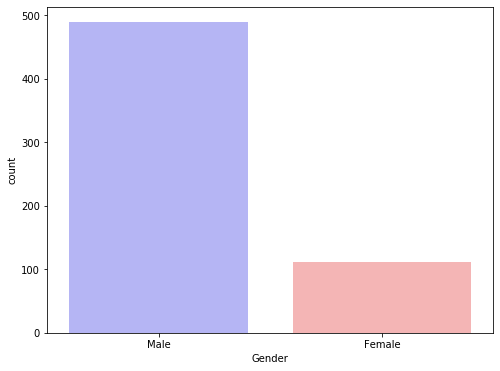

In [12]:
plt.figure(figsize = (8,6)) 
sns.countplot(x="Gender", data=loanData, palette="bwr")
plt.show()

In [13]:
loanData.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
loanData[loanData['Gender'].isna() == True].index

Int64Index([23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592], dtype='int64')

In [15]:
loanData[loanData['Gender'].isna() == True].head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
23   LP001050    NaN     Yes          2  Not Graduate            No   
126  LP001448    NaN     Yes         3+      Graduate            No   
171  LP001585    NaN     Yes         3+      Graduate            No   
188  LP001644    NaN     Yes          0      Graduate           Yes   
314  LP002024    NaN     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
23              3365             1917.0       112.0             360.0   
126            23803                0.0       370.0             360.0   
171            51763                0.0       700.0             300.0   
188              674             5296.0       168.0             360.0   
314             2473             1843.0       159.0             360.0   

     Credit_History Property_Area Loan_Status  
23              0.0         Rural           N  
126             1.0         Rural           Y  
171             1.0         Urban           Y  
188             1.0         Rural           Y  
314             1.0         Rural           N

In [16]:
#Fill Gender Null Value with top of Gender
loanData['Gender'] = loanData['Gender'].fillna('Male')
loanData.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Married Null Value

In [17]:
loanData['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [18]:
loanData['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [19]:
loanData[loanData['Married'].isna() == True].index

Int64Index([104, 228, 435], dtype='int64')

In [20]:
loanData[(loanData['Married'] == 'Yes') & (loanData['CoapplicantIncome'] > 0)].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       270.000000         270.000000  262.000000        263.000000   
mean       4092.466667        2645.421926  149.446565        341.612167   
std        3395.876158        1970.419128   71.598143         63.711793   
min         150.000000          16.120001   17.000000         12.000000   
25%        2502.500000        1594.000000  110.000000        360.000000   
50%        3299.500000        2136.000000  132.000000        360.000000   
75%        4575.750000        3166.750000  172.750000        360.000000   
max       39147.000000       20000.000000  570.000000        480.000000   

       Credit_History  
count      245.000000  
mean         0.836735  
std          0.370364  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [21]:
#Fill Maried Null value by CoapplicantIncome
#If CoapplicantIncome > 0 => Married == Yes, else => Married == No.
Married1 = 'Yes'
Married2 = 'No'


locMarried1 = loanData[(loanData['CoapplicantIncome'] > 0) & (loanData['Married'].isna() == True)]['Married'].index
locMarried2 = loanData[(loanData['CoapplicantIncome'] == 0) & (loanData['Married'].isna() == True)]['Married'].index


loanData['Married'].iloc[locMarried1] = loanData['Married'].iloc[locMarried1].fillna(Married1)
loanData['Married'].iloc[locMarried2] = loanData['Married'].iloc[locMarried2].fillna(Married2)


pd.set_option('display.max_rows', None)
loanData

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate           NaN   
20   LP001043    Male     Yes          0  Not Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050    Male     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate           NaN   
25   LP001066    Male     Yes          0      Graduate           Yes   
26   LP001068    Male     Yes          0      Graduate            No   
27   LP001073    Male     Yes          2  Not Graduate            No   
28   LP001086    Male      No          0  Not Graduate            No   
29   LP001087  Female      No          2      Graduate           NaN   
30   LP001091    Male     Yes          1      Graduate           NaN   
31   LP001095    Male      No          0      Graduate            No   
32   LP001097    Male      No          1      Graduate           Yes   
33   LP001098    Male     Yes          0      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
35   LP001106    Male     Yes          0      Graduate            No   
36   LP001109    Male     Yes          0      Graduate            No   
37   LP001112  Female     Yes          0      Graduate            No   
38   LP001114    Male      No          0      Graduate            No   
39   LP001116    Male      No          0  Not Graduate            No   
40   LP001119    Male      No          0      Graduate            No   
41   LP001120    Male      No          0      Graduate            No   
42   LP001123    Male     Yes          0      Graduate            No   
43   LP001131    Male     Yes          0      Graduate            No   
44   LP001136    Male     Yes          0  Not Graduate           Yes   
45   LP001137  Female      No          0      Graduate            No   
46   LP001138    Male     Yes          1      Graduate            No   
47   LP001144    Male     Yes          0      Graduate            No   
48   LP001146  Female     Yes          0      Graduate            No   
49   LP001151  Female      No          0      Graduate            No   
50   LP001155  Female     Yes          0  Not Graduate            No   
51   LP001157  Female      No          0      Graduate            No   
52   LP001164  Female      No          0      Graduate            No   
53   LP001179    Male     Yes          2      Graduate            No   
54   LP001186  Female     Yes          1      

In [22]:
loanData.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Dependents Null Values

In [23]:
loanData[loanData['Dependents'].isna() == True]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
102  LP001350    Male     Yes        NaN      Graduate            No   
104  LP001357    Male     Yes        NaN      Graduate            No   
120  LP001426    Male     Yes        NaN      Graduate            No   
226  LP001754    Male     Yes        NaN  Not Graduate           Yes   
228  LP001760    Male      No        NaN      Graduate            No   
293  LP001945  Female      No        NaN      Graduate            No   
301  LP001972    Male     Yes        NaN  Not Graduate            No   
332  LP002100    Male      No        NaN      Graduate            No   
335  LP002106    Male     Yes        NaN      Graduate           Yes   
346  LP002130    Male     Yes        NaN  Not Graduate            No   
355  LP002144  Female      No        NaN      Graduate            No   
435  LP002393  Female      No        NaN      Graduate            No   
517  LP002682    Male     Yes        NaN  Not Graduate            No   
571  LP002847    Male     Yes        NaN      Graduate            No   
597  LP002943    Male      No        NaN      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
102            13650                0.0         NaN             360.0   
104             3816              754.0       160.0             360.0   
120             5667             2667.0       180.0             360.0   
226             4735                0.0       138.0             360.0   
228             4758                0.0       158.0             480.0   
293             5417                0.0       143.0             480.0   
301             2875             1750.0       105.0             360.0   
332             2833                0.0        71.0             360.0   
335             5503             4490.0        70.0               NaN   
346             3523             3230.0       152.0             360.0   
355             3813                0.0       116.0             180.0   
435            10047                0.0         NaN             240.0   
517             3074             1800.0       123.0             360.0   
571             5116             1451.0       165.0             360.0   
597             2987                0.0        88.0             360.0   

     Credit_History Property_Area Loan_Status  
102             1.0         Urban           Y  
104             1.0         Urban           Y  
120             1.0         Rural           Y  
226             1.0         Urban           N  
228             1.0     Semiurban           Y  
293             0.0         Urban           N  
301             1.0     Semiurban           Y  
332             1.0         Urban           Y  
335             1.0     Semiurban           Y  
346             0.0         Rural           N  
355             1.0         Urban           Y  
435             1.0     Semiurban           Y  
517             0.0     Semiurban           N  
571             0.0         Urban           N  
597             0.0     Semiurban           N

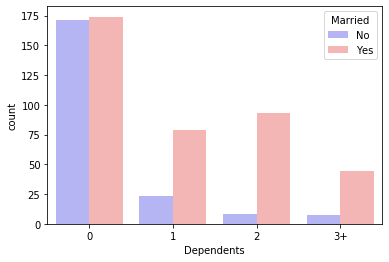

In [24]:
sns.countplot(x="Dependents", data=loanData, hue='Married', palette="bwr")
plt.show()

#### Dilihat dari Visuaisasi diatas, terlihat antara Feature Dependent dan Feature Married Status Tidak Ada pengaruh berarti dimana dari data yang terkumpul terlihat yang sudah menikah pun banyak yang Status dependent nya 0 (Tidak ada tanggungan)

In [25]:
loanData['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [26]:
loanData['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [27]:
loanData[(loanData['ApplicantIncome'] > 5795.000000) & (loanData['Dependents'].isna() == True)]

Loan_ID  Gender Married Dependents Education Self_Employed  \
102  LP001350    Male     Yes        NaN  Graduate            No   
435  LP002393  Female      No        NaN  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
102            13650                0.0         NaN             360.0   
435            10047                0.0         NaN             240.0   

     Credit_History Property_Area Loan_Status  
102             1.0         Urban           Y  
435             1.0     Semiurban           Y

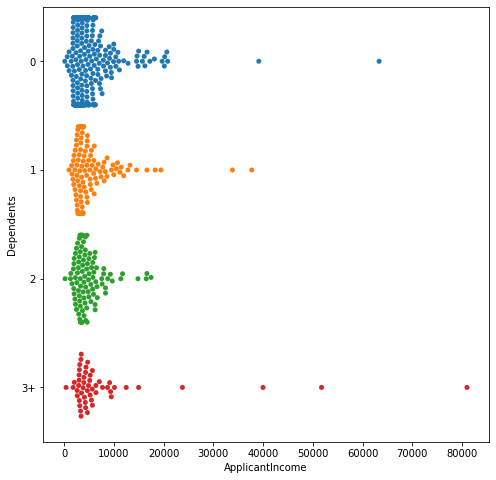

In [28]:
plt.figure(figsize = (8,8)) 

sns.swarmplot(data = loanData, x='ApplicantIncome', y='Dependents')

Dari Visualisasi diatas terlihat applicant dengan Jumlah Dependent 0 s/d 3+ tersebar cukup merata dengan icome s/d 10000


- Data akan dibagi menjadi seperti berikut:
1. ApplicantIncome < 25% = 0 Dependent
2. ApplicantIncome > 25% & ApplicantIncome < 50% = 1 Dependent
3. ApplicantIncome > 50% & ApplicantIncome < 75% = 2 Dependent
4. ApplicantIncome > 75% = 3+ Dependent

In [29]:
Dependent0 = '0'
Dependent1 = '1'
Dependent2 = '2'
Dependent3 = '3+'

locDependent0 = loanData[(loanData['ApplicantIncome'] <= 2877.500000) & (loanData['Dependents'].isna() == True)]['Dependents'].index
locDependent1 = loanData[((loanData['ApplicantIncome'] > 2877.500000) & (loanData['ApplicantIncome'] <= 3812.500000)) & (loanData['Dependents'].isna() == True)]['Dependents'].index
locDependent2 = loanData[((loanData['ApplicantIncome'] > 3812.500000) & (loanData['ApplicantIncome'] <= 5795.000000)) & (loanData['Dependents'].isna() == True)]['Dependents'].index
locDependent3 = loanData[(loanData['ApplicantIncome'] > 5795.000000) & (loanData['Dependents'].isna() == True)]['Dependents'].index

loanData['Dependents'].iloc[locDependent0] = loanData['Dependents'].iloc[locDependent0].fillna(Dependent0)
loanData['Dependents'].iloc[locDependent1] = loanData['Dependents'].iloc[locDependent1].fillna(Dependent1)
loanData['Dependents'].iloc[locDependent2] = loanData['Dependents'].iloc[locDependent2].fillna(Dependent2)
loanData['Dependents'].iloc[locDependent3] = loanData['Dependents'].iloc[locDependent3].fillna(Dependent3)

pd.set_option('display.max_rows', None)
loanData

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate           NaN   
20   LP001043    Male     Yes          0  Not Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050    Male     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate           NaN   
25   LP001066    Male     Yes          0      Graduate           Yes   
26   LP001068    Male     Yes          0      Graduate            No   
27   LP001073    Male     Yes          2  Not Graduate            No   
28   LP001086    Male      No          0  Not Graduate            No   
29   LP001087  Female      No          2      Graduate           NaN   
30   LP001091    Male     Yes          1      Graduate           NaN   
31   LP001095    Male      No          0      Graduate            No   
32   LP001097    Male      No          1      Graduate           Yes   
33   LP001098    Male     Yes          0      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
35   LP001106    Male     Yes          0      Graduate            No   
36   LP001109    Male     Yes          0      Graduate            No   
37   LP001112  Female     Yes          0      Graduate            No   
38   LP001114    Male      No          0      Graduate            No   
39   LP001116    Male      No          0  Not Graduate            No   
40   LP001119    Male      No          0      Graduate            No   
41   LP001120    Male      No          0      Graduate            No   
42   LP001123    Male     Yes          0      Graduate            No   
43   LP001131    Male     Yes          0      Graduate            No   
44   LP001136    Male     Yes          0  Not Graduate           Yes   
45   LP001137  Female      No          0      Graduate            No   
46   LP001138    Male     Yes          1      Graduate            No   
47   LP001144    Male     Yes          0      Graduate            No   
48   LP001146  Female     Yes          0      Graduate            No   
49   LP001151  Female      No          0      Graduate            No   
50   LP001155  Female     Yes          0  Not Graduate            No   
51   LP001157  Female      No          0      Graduate            No   
52   LP001164  Female      No          0      Graduate            No   
53   LP001179    Male     Yes          2      Graduate            No   
54   LP001186  Female     Yes          1      

In [30]:
loanData.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Self_Employed Null Values

In [31]:
loanData[loanData['Self_Employed'].isna() == True]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
11   LP001027    Male     Yes          2      Graduate           NaN   
19   LP001041    Male     Yes          0      Graduate           NaN   
24   LP001052    Male     Yes          1      Graduate           NaN   
29   LP001087  Female      No          2      Graduate           NaN   
30   LP001091    Male     Yes          1      Graduate           NaN   
95   LP001326    Male      No          0      Graduate           NaN   
107  LP001370    Male      No          0  Not Graduate           NaN   
111  LP001387  Female     Yes          0      Graduate           NaN   
114  LP001398    Male      No          0      Graduate           NaN   
158  LP001546    Male      No          0      Graduate           NaN   
170  LP001581    Male     Yes          0  Not Graduate           NaN   
218  LP001732    Male     Yes          2      Graduate           NaN   
231  LP001768    Male     Yes          0      Graduate           NaN   
236  LP001786    Male     Yes          0      Graduate           NaN   
268  LP001883  Female      No          0      Graduate           NaN   
295  LP001949    Male     Yes         3+      Graduate           NaN   
333  LP002101    Male     Yes          0      Graduate           NaN   
336  LP002110    Male     Yes          1      Graduate           NaN   
344  LP002128    Male     Yes          2      Graduate           NaN   
374  LP002209  Female      No          0      Graduate           NaN   
380  LP002226    Male     Yes          0      Graduate           NaN   
385  LP002237    Male      No          1      Graduate           NaN   
411  LP002319    Male     Yes          0      Graduate           NaN   
432  LP002386    Male      No          0      Graduate           NaN   
447  LP002435    Male     Yes          0      Graduate           NaN   
463  LP002489  Female      No          1  Not Graduate           NaN   
468  LP002502  Female     Yes          2  Not Graduate           NaN   
535  LP002732    Male      No          0  Not Graduate           NaN   
542  LP002753  Female      No          1      Graduate           NaN   
579  LP002888    Male      No          0      Graduate           NaN   
600  LP002949  Female      No         3+      Graduate           NaN   
601  LP002950    Male     Yes          0  Not Graduate           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
11              2500             1840.0       109.0             360.0   
19              2600             3500.0       115.0               NaN   
24              3717             2925.0       151.0             360.0   
29              3750             2083.0       120.0             360.0   
30              4166             3369.0       201.0             360.0   
95              6782                0.0         NaN             360.0   
107             7333                0.0       120.0             360.0   
111             2929             2333.0       139.0             360.0   
114             5050                0.0       118.0             360.0   
158             2980             2083.0       120.0             360.0   
170             1820             1769.0        95.0             360.0   
218             5000                0.0        72.0             360.0   
231             3716                0.0        42.0             180.0   
236             5746                0.0       255.0             360.0   
268             3418                0.0       135.0             360.0   
295             4416             1250.0       110.0             360.0   
333            63337                0.0       490.0             180.0   
336             5250              688.0       160.0             360.0   
344             2583             2330.0       125.0             360.0   
374             2764             1459.0       110.0             360.0   
380             3333             2500.0       128.0             360.0   
385             3667   

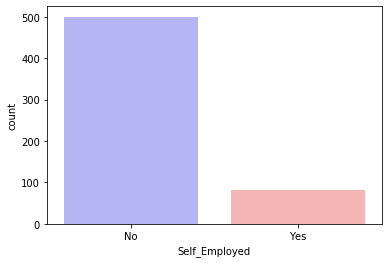

In [32]:
sns.countplot(x="Self_Employed", data=loanData, palette="bwr")
plt.show()

In [33]:
loanData.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [34]:
loanData.Self_Employed.describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [35]:
#By Top of Self_Employed
loanData['Self_Employed'] = loanData['Self_Employed'].fillna('No')
loanData.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### LoanAmount NullVall

In [36]:
loanData[loanData['LoanAmount'].isna() == True]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
35   LP001106    Male     Yes          0      Graduate            No   
63   LP001213    Male     Yes          1      Graduate            No   
81   LP001266    Male     Yes          1      Graduate           Yes   
95   LP001326    Male      No          0      Graduate            No   
102  LP001350    Male     Yes         3+      Graduate            No   
103  LP001356    Male     Yes          0      Graduate            No   
113  LP001392  Female      No          1      Graduate           Yes   
127  LP001449    Male      No          0      Graduate            No   
202  LP001682    Male     Yes         3+  Not Graduate            No   
284  LP001922    Male     Yes          0      Graduate            No   
305  LP001990    Male      No          0  Not Graduate            No   
322  LP002054    Male     Yes          2  Not Graduate            No   
338  LP002113  Female      No         3+  Not Graduate            No   
387  LP002243    Male     Yes          0  Not Graduate            No   
435  LP002393  Female      No         3+      Graduate            No   
437  LP002401    Male     Yes          0      Graduate            No   
479  LP002533    Male     Yes          2      Graduate            No   
524  LP002697    Male      No          0      Graduate            No   
550  LP002778    Male     Yes          2      Graduate           Yes   
551  LP002784    Male     Yes          1  Not Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
35              2275             2067.0         NaN             360.0   
63              4945                0.0         NaN             360.0   
81              2395                0.0         NaN             360.0   
95              6782                0.0         NaN             360.0   
102            13650                0.0         NaN             360.0   
103             4652             3583.0         NaN             360.0   
113             7451                0.0         NaN             360.0   
127             3865             1640.0         NaN             360.0   
202             3992                0.0         NaN             180.0   
284            20667                0.0         NaN             360.0   
305             2000                0.0         NaN             360.0   
322             3601             1590.0         NaN             360.0   
338             1830                0.0         NaN             360.0   
387             3010             3136.0         NaN             360.0   
435            10047                0.0         NaN             240.0   
437             2213             1125.0         NaN             360.0   
479             2947             1603.0         NaN             360.0   
524             4680             2087.0         NaN             360.0   
550             6633                0.0         NaN             360.0   
551             2492             2375.0         NaN             360.0   
605             2400             3800.0         NaN             180.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
35              1.0         Urban           Y  
63              0.0         Rural           N  
81              1.0     Semiurban           Y  
95              NaN         Urban           N  
102             1.0         Urban           Y  
103             1.0     Semiurban           Y  
113             1.0     Semiurban           Y  
127             1.0         Rural           Y  
202             1.0         Urban           N  
284             1.0         Rural           N  
305             1.0         Urban           N  
322             1.0         Rural           Y

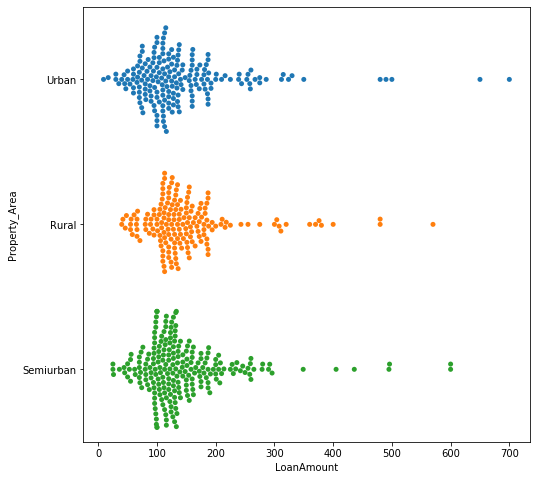

In [37]:
plt.figure(figsize = (8,8)) 

sns.swarmplot(data = loanData, x='LoanAmount', y='Property_Area')

#### Dari Visualisasi diatas terlihat Tidak ada pengaruh signifikan antara Loan Amount dan Property area.

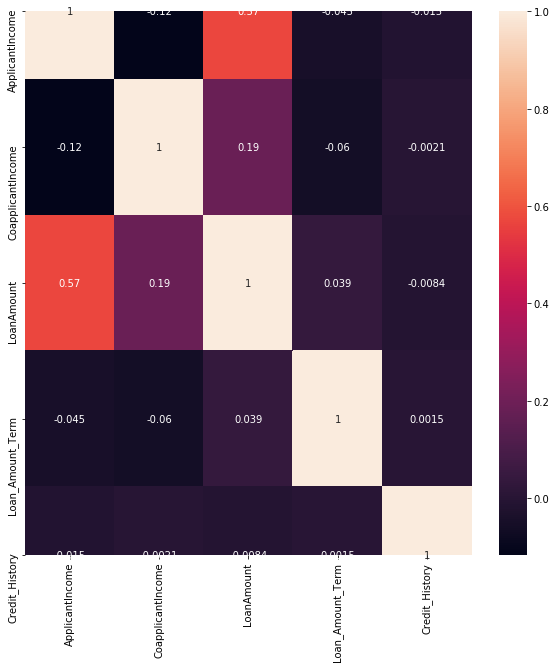

In [38]:
#Melihat Corelasi secara keseluruhan
plt.figure(figsize = (10,10))
sns.heatmap(loanData.corr(), annot = True)

#### Saat dilihat correlasi keseluruhan nya corelasi yang cukup erat dengan Loan amount adalah applicant income

In [39]:
import statsmodels.api as sm
import pylab

def create_qqplot(data,title):
    sm.qqplot(data, line = '45')
    plt.title(title)
    pylab.show()

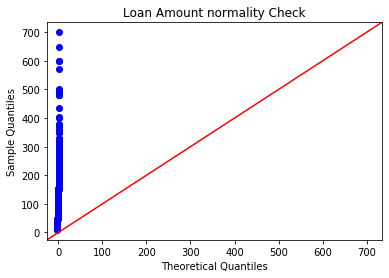

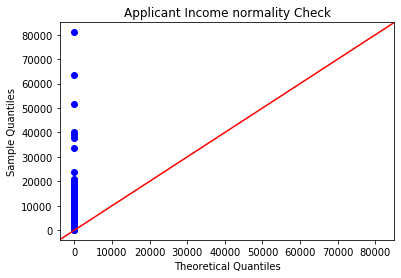

In [40]:
create_qqplot(loanData['LoanAmount'], 'Loan Amount normality Check')
create_qqplot(loanData['ApplicantIncome'], 'Applicant Income normality Check')

#### Dari Visulisasi diatas terlihat bahwa kedua Feature tidak terdistribusi normal, sehingga utuk menguji corelasinya kita menggunakan 'Spearman'

In [41]:
loanData[['LoanAmount', 'ApplicantIncome']].corr('spearman')

LoanAmount  ApplicantIncome
LoanAmount         1.000000         0.515397
ApplicantIncome    0.515397         1.000000

#### Setelah diuji Correlasi dengan Spearman, terlihat Kedua feature memang hubungannya cukup erat.

In [42]:
loanData.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [43]:
loanData.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [44]:
loanData[(loanData['ApplicantIncome'] > 5795.000000) & (loanData['LoanAmount'] > 500)]

Loan_ID  Gender Married Dependents Education Self_Employed  \
130  LP001469    Male      No          0  Graduate           Yes   
155  LP001536    Male     Yes         3+  Graduate            No   
171  LP001585    Male     Yes         3+  Graduate            No   
369  LP002191    Male     Yes          0  Graduate            No   
561  LP002813  Female     Yes          1  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
130            20166                0.0       650.0             480.0   
155            39999                0.0       600.0             180.0   
171            51763                0.0       700.0             300.0   
369            19730             5266.0       570.0             360.0   
561            19484                0.0       600.0             360.0   

     Credit_History Property_Area Loan_Status  
130             NaN         Urban           Y  
155             0.0     Semiurban           Y  
171             1.0         Urban           Y  
369             1.0         Rural           N  
561             1.0     Semiurban           Y

LoanAmount :

- 25%--100.000000
- 50%--128.000000
- 75%--168.000000
- max--700.000000


applicantIncome:

- <= 25% (2877.500000) = 25% LoanAmount
- bigger than 25% (2877.500000) & <= 50% (3812.500000) = 50% LoanAmount
- bigger than 50% (3812.500000) & <= 75% (5795.000000) = 75% LoanAmount
- bigger than 75% (5795.000000) = max LoanAmount

In [45]:
loan1 = loanData[loanData['ApplicantIncome'] <= 2877.500000].describe()['LoanAmount']['25%']
loan2 = loanData[(loanData['ApplicantIncome'] > 2877.500000) & (loanData['ApplicantIncome'] <= 3812.500000)].describe()['LoanAmount']['50%']
loan3 = loanData[(loanData['ApplicantIncome'] > 3812.500000) & (loanData['ApplicantIncome'] <= 5795.000000 )].describe()['LoanAmount']['75%']
loan4 = loanData[loanData['ApplicantIncome'] > 5795.000000 ].describe()['LoanAmount']['max']

locLoan1 = loanData[(loanData['ApplicantIncome'] <= 2877.500000) & (loanData['LoanAmount'].isna() == True)]['LoanAmount'].index
locLoan2 = loanData[((loanData['ApplicantIncome'] > 2877.500000) & (loanData['ApplicantIncome'] <= 3812.500000)) & (loanData['LoanAmount'].isna() == True)]['LoanAmount'].index
locLoan3 = loanData[((loanData['ApplicantIncome'] > 3812.500000) & (loanData['ApplicantIncome'] <= 5795.000000)) & (loanData['LoanAmount'].isna() == True)]['LoanAmount'].index
locLoan4 = loanData[(loanData['ApplicantIncome'] > 5795.000000) & (loanData['LoanAmount'].isna() == True)]['LoanAmount'].index

loanData['LoanAmount'].iloc[locLoan1] = loanData['LoanAmount'].iloc[locLoan1].fillna(loan1)
loanData['LoanAmount'].iloc[locLoan2] = loanData['LoanAmount'].iloc[locLoan2].fillna(loan2)
loanData['LoanAmount'].iloc[locLoan3] = loanData['LoanAmount'].iloc[locLoan3].fillna(loan3)
loanData['LoanAmount'].iloc[locLoan4] = loanData['LoanAmount'].iloc[locLoan4].fillna(loan4)

pd.set_option('display.max_rows', None)
loanData

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate            No   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate            No   
20   LP001043    Male     Yes          0  Not Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050    Male     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate            No   
25   LP001066    Male     Yes          0      Graduate           Yes   
26   LP001068    Male     Yes          0      Graduate            No   
27   LP001073    Male     Yes          2  Not Graduate            No   
28   LP001086    Male      No          0  Not Graduate            No   
29   LP001087  Female      No          2      Graduate            No   
30   LP001091    Male     Yes          1      Graduate            No   
31   LP001095    Male      No          0      Graduate            No   
32   LP001097    Male      No          1      Graduate           Yes   
33   LP001098    Male     Yes          0      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
35   LP001106    Male     Yes          0      Graduate            No   
36   LP001109    Male     Yes          0      Graduate            No   
37   LP001112  Female     Yes          0      Graduate            No   
38   LP001114    Male      No          0      Graduate            No   
39   LP001116    Male      No          0  Not Graduate            No   
40   LP001119    Male      No          0      Graduate            No   
41   LP001120    Male      No          0      Graduate            No   
42   LP001123    Male     Yes          0      Graduate            No   
43   LP001131    Male     Yes          0      Graduate            No   
44   LP001136    Male     Yes          0  Not Graduate           Yes   
45   LP001137  Female      No          0      Graduate            No   
46   LP001138    Male     Yes          1      Graduate            No   
47   LP001144    Male     Yes          0      Graduate            No   
48   LP001146  Female     Yes          0      Graduate            No   
49   LP001151  Female      No          0      Graduate            No   
50   LP001155  Female     Yes          0  Not Graduate            No   
51   LP001157  Female      No          0      Graduate            No   
52   LP001164  Female      No          0      Graduate            No   
53   LP001179    Male     Yes          2      Graduate            No   
54   LP001186  Female     Yes          1      

In [46]:
loanData.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Loan_Amount_Term Null Values

In [47]:
loanData[loanData['Loan_Amount_Term'].isna() == True]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
19   LP001041    Male     Yes          0      Graduate            No   
36   LP001109    Male     Yes          0      Graduate            No   
44   LP001136    Male     Yes          0  Not Graduate           Yes   
45   LP001137  Female      No          0      Graduate            No   
73   LP001250    Male     Yes         3+  Not Graduate            No   
112  LP001391    Male     Yes          0  Not Graduate            No   
165  LP001574    Male     Yes          0      Graduate            No   
197  LP001669  Female      No          0  Not Graduate            No   
223  LP001749    Male     Yes          0      Graduate            No   
232  LP001770    Male      No          0  Not Graduate            No   
335  LP002106    Male     Yes          2      Graduate           Yes   
367  LP002188    Male      No          0      Graduate            No   
421  LP002357  Female      No          0  Not Graduate            No   
423  LP002362    Male     Yes          1      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
19              2600             3500.0       115.0               NaN   
36              1828             1330.0       100.0               NaN   
44              4695                0.0        96.0               NaN   
45              3410                0.0        88.0               NaN   
73              4755                0.0        95.0               NaN   
112             3572             4114.0       152.0               NaN   
165             3707             3166.0       182.0               NaN   
197             1907             2365.0       120.0               NaN   
223             7578             1010.0       175.0               NaN   
232             3189             2598.0       120.0               NaN   
335             5503             4490.0        70.0               NaN   
367             5124                0.0       124.0               NaN   
421             2720                0.0        80.0               NaN   
423             7250             1667.0       110.0               NaN   

     Credit_History Property_Area Loan_Status  
19              1.0         Urban           Y  
36              0.0         Urban           N  
44              1.0         Urban           Y  
45              1.0         Urban           Y  
73              0.0     Semiurban           N  
112             0.0         Rural           N  
165             1.0         Rural           Y  
197             1.0         Urban           Y  
223             1.0     Semiurban           Y  
232             1.0         Rural           Y  
335             1.0     Semiurban           Y  
367             0.0         Rural           N  
421             0.0         Urban           N  
423             0.0         Urban           N

In [48]:
#By Median
loanData[(loanData['Loan_Amount_Term'].isna() == False) & (loanData['Loan_Status'] == 'Y')].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       414.000000         414.000000  414.000000        414.000000   
mean       5409.391304        1492.214783  149.574879        341.072464   
std        5813.326266        1929.285418  101.059462         63.247770   
min         210.000000           0.000000   17.000000         12.000000   
25%        2877.500000           0.000000  100.000000        360.000000   
50%        3813.500000        1221.000000  127.500000        360.000000   
75%        5795.000000        2252.250000  161.750000        360.000000   
max       63337.000000       20000.000000  700.000000        480.000000   

       Credit_History  
count      377.000000  
mean         0.981432  
std          0.135172  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [49]:
loanData['Loan_Amount_Term'] = loanData['Loan_Amount_Term'].fillna(360.0)
loanData.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Credit_History Null Values

In [50]:
loanData.Credit_History.describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

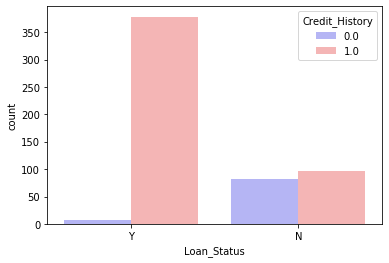

In [51]:
sns.countplot(x="Loan_Status", data=loanData, hue='Credit_History', palette="bwr")
plt.show()

#### Dilihat dari visualisasi diatas, kebanyakan applicant yang Loan Statusnya diterima (Y) Status Credit historynya = 1, sehingga untu mengisi Null value nya di bagi menjadi berikut:

If Loan_Status == Y => Credit_History == 1 , else Credit_History == 0

In [52]:
History1 = 1.0
History2 = 0.0


locHistory1 = loanData[(loanData['Loan_Status'] == 'Y') & (loanData['Credit_History'].isna() == True)]['Credit_History'].index
locHistory2 = loanData[(loanData['Loan_Status'] == 'N') & (loanData['Credit_History'].isna() == True)]['Credit_History'].index


loanData['Credit_History'].iloc[locHistory1] = loanData['Credit_History'].iloc[locHistory1].fillna(History1)
loanData['Credit_History'].iloc[locHistory2] = loanData['Credit_History'].iloc[locHistory2].fillna(History2)


pd.set_option('display.max_rows', None)
loanData

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate            No   
12   LP001028    Male     Yes          2      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
14   LP001030    Male     Yes          2      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
19   LP001041    Male     Yes          0      Graduate            No   
20   LP001043    Male     Yes          0  Not Graduate            No   
21   LP001046    Male     Yes          1      Graduate            No   
22   LP001047    Male     Yes          0  Not Graduate            No   
23   LP001050    Male     Yes          2  Not Graduate            No   
24   LP001052    Male     Yes          1      Graduate            No   
25   LP001066    Male     Yes          0      Graduate           Yes   
26   LP001068    Male     Yes          0      Graduate            No   
27   LP001073    Male     Yes          2  Not Graduate            No   
28   LP001086    Male      No          0  Not Graduate            No   
29   LP001087  Female      No          2      Graduate            No   
30   LP001091    Male     Yes          1      Graduate            No   
31   LP001095    Male      No          0      Graduate            No   
32   LP001097    Male      No          1      Graduate           Yes   
33   LP001098    Male     Yes          0      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
35   LP001106    Male     Yes          0      Graduate            No   
36   LP001109    Male     Yes          0      Graduate            No   
37   LP001112  Female     Yes          0      Graduate            No   
38   LP001114    Male      No          0      Graduate            No   
39   LP001116    Male      No          0  Not Graduate            No   
40   LP001119    Male      No          0      Graduate            No   
41   LP001120    Male      No          0      Graduate            No   
42   LP001123    Male     Yes          0      Graduate            No   
43   LP001131    Male     Yes          0      Graduate            No   
44   LP001136    Male     Yes          0  Not Graduate           Yes   
45   LP001137  Female      No          0      Graduate            No   
46   LP001138    Male     Yes          1      Graduate            No   
47   LP001144    Male     Yes          0      Graduate            No   
48   LP001146  Female     Yes          0      Graduate            No   
49   LP001151  Female      No          0      Graduate            No   
50   LP001155  Female     Yes          0  Not Graduate            No   
51   LP001157  Female      No          0      Graduate            No   
52   LP001164  Female      No          0      Graduate            No   
53   LP001179    Male     Yes          2      Graduate            No   
54   LP001186  Female     Yes          1      

In [53]:
loanData.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


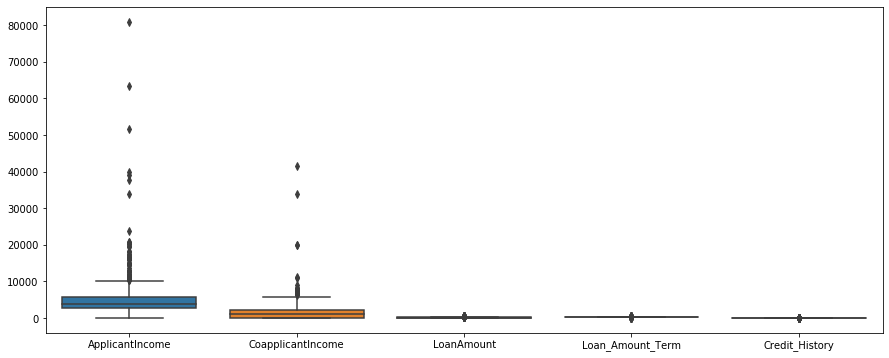

In [55]:
plt.subplots(figsize=(15,6))
sns.boxplot(data=loanData)

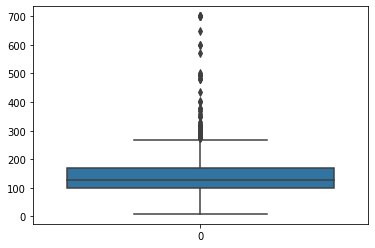

In [56]:
sns.boxplot(data=loanData['LoanAmount'])

# EDA

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


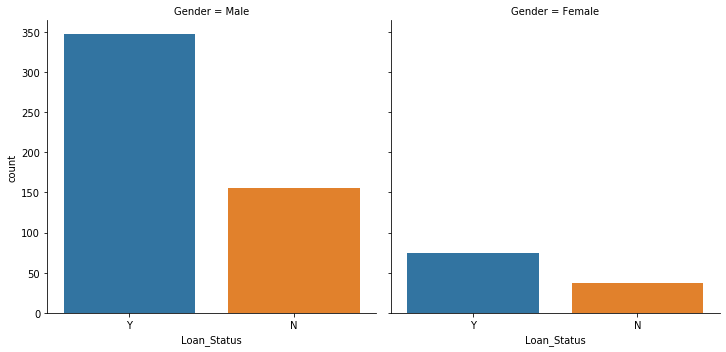

In [57]:
sns.factorplot(x='Loan_Status', col='Gender', kind='count', data=loanData)

#### Applicant dengan jenis kelamin pria. lebih banyak melakukan pinjaman, hal ini besar kemungkinan terjadi karena memang pria merupakan kepala keluarga, dimana tentu mereka bertanggung jawab atas keluarganya.

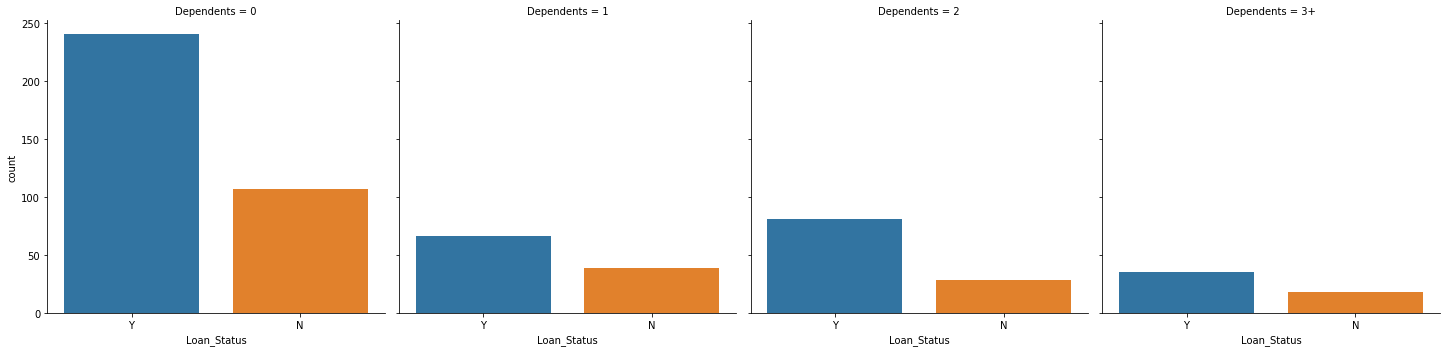

In [58]:
sns.factorplot(x='Loan_Status', col='Dependents', kind='count', data=loanData)

#### Applicant dengan jumlah Dependent = 0 ternyata lebih banyak melakukan pinjaman, hal ini mungkin terjadi menimbang ada kemungknan applicant tersbut baru memulai hidup yang baru dengan pendapatan awal mereka.

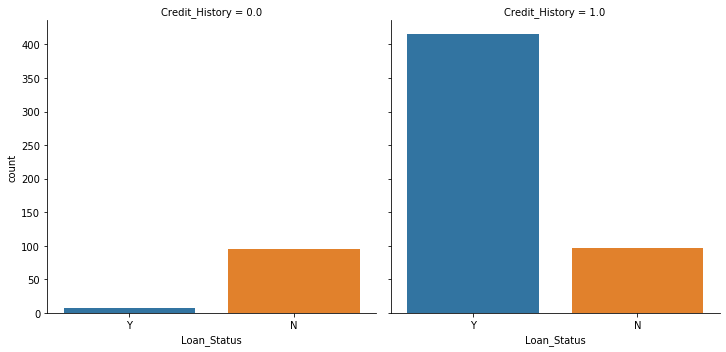

In [59]:
sns.factorplot(x='Loan_Status', col='Credit_History', kind='count', data=loanData)

#### Dari Visualisasi Credit History diatas  dapat dilihat ternyata memang yang memiliki credit history potensi pinjamannya di acc lebih tingggi

In [71]:
loanData[(loanData['Credit_History'] == 0.0) & (loanData['Loan_Status'] == 'Y')].describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count         7.000000           7.000000    7.000000          7.000000   
mean       9153.857143        2098.142857  206.285714        308.571429   
std       13657.838329        3194.546208  175.579720         87.831007   
min        2137.000000           0.000000   90.000000        180.000000   
25%        3408.000000           0.000000  133.500000        270.000000   
50%        4917.000000        1430.000000  160.000000        360.000000   
75%        5104.000000        2138.500000  163.500000        360.000000   
max       39999.000000        8980.000000  600.000000        360.000000   

       Credit_History  
count             7.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

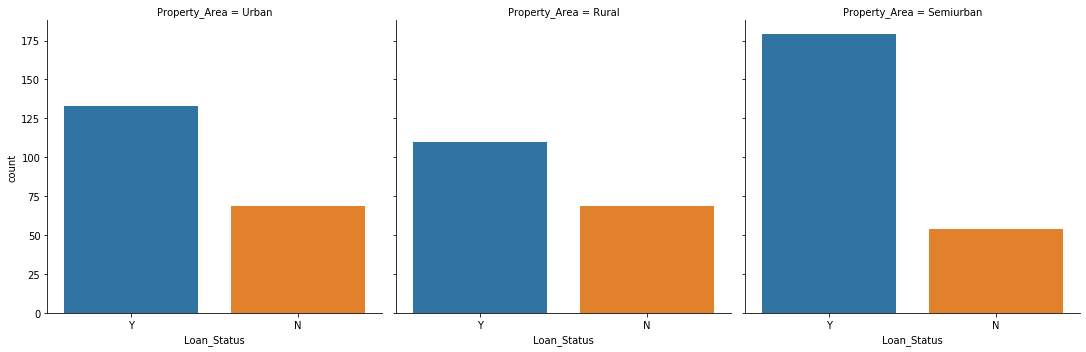

In [62]:
sns.factorplot(x='Loan_Status', col='Property_Area', kind='count', data=loanData)

#### Dari Visualisasi diatas dapat saya simpulkan bahwa applicant tersebar dari berbagai kalangan

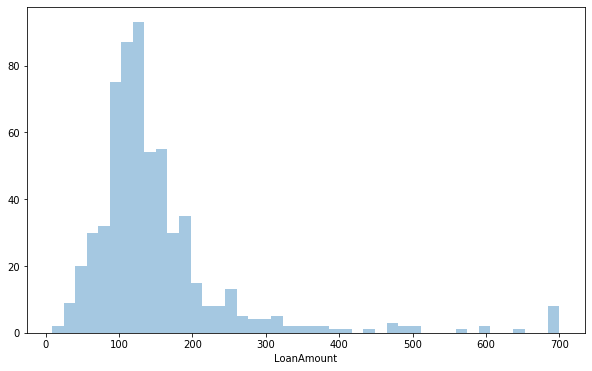

In [61]:
plt.subplots(figsize=(10,6))
sns.distplot(loanData.LoanAmount, kde=False);

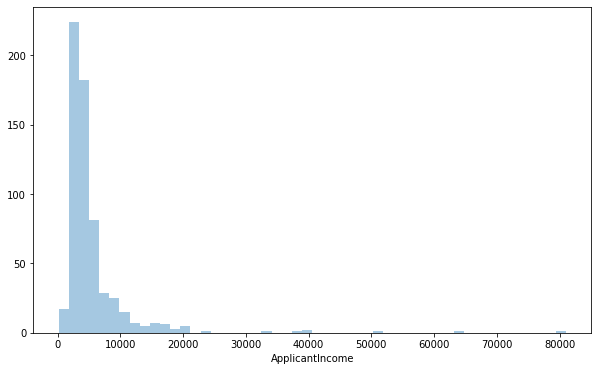

In [62]:
plt.subplots(figsize=(10,6))
sns.distplot(loanData.ApplicantIncome, kde=False);

Loan_Status
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: LoanAmount, dtype: object

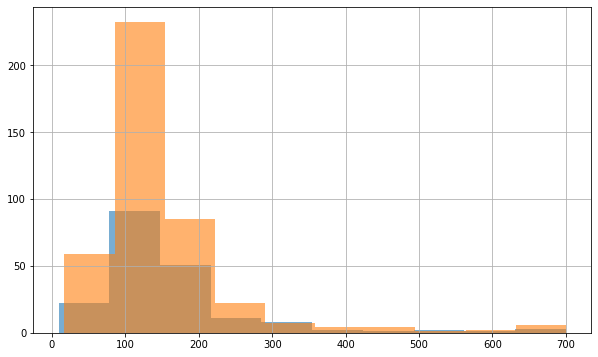

In [63]:
plt.subplots(figsize=(10,6))
loanData.groupby('Loan_Status').LoanAmount.hist(alpha=0.6)


#### Aplicant dengan jumlah pinjaman 90 - 150 lebih banyak di terima

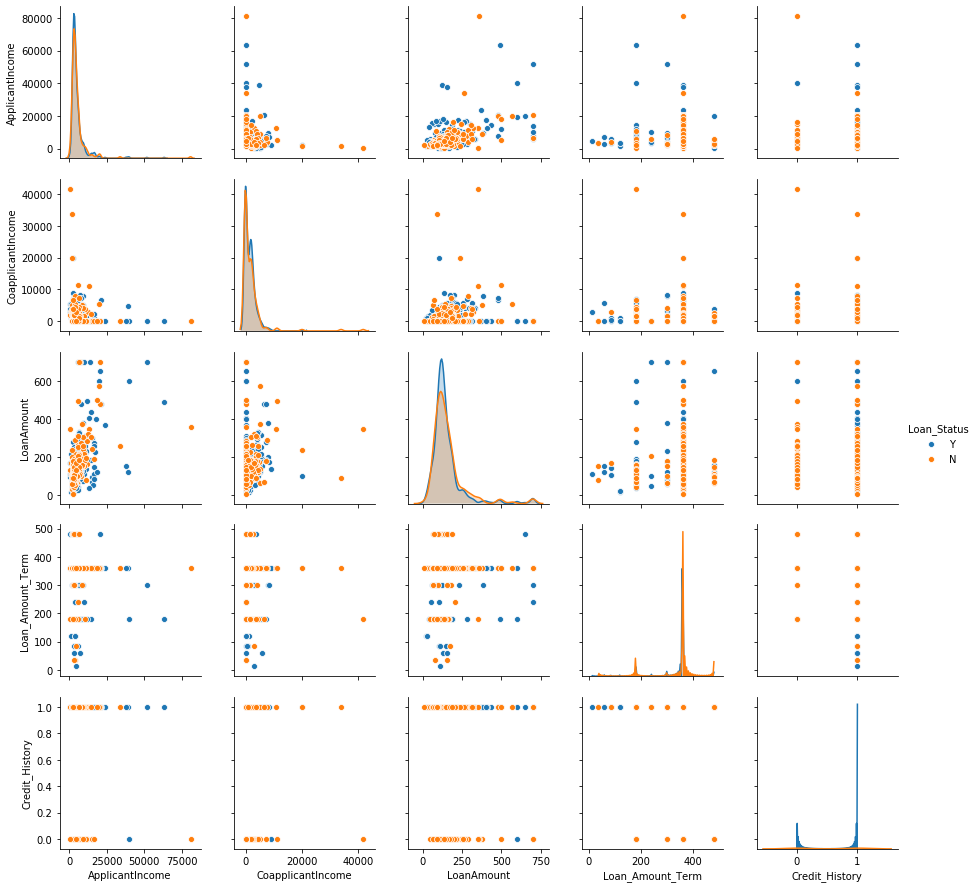

In [64]:
sns.pairplot(loanData, hue='Loan_Status');

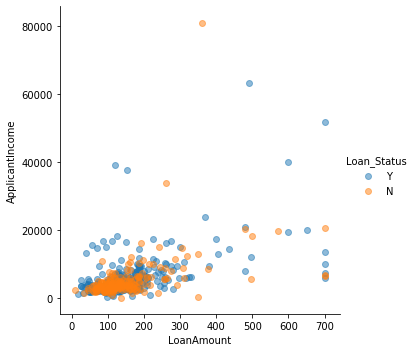

In [65]:
sns.lmplot(x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', data=loanData, fit_reg=False, scatter_kws={'alpha':0.5})

#### Pada Visualisasi datas terlihat applicant dengan pendapatan di bawah 8000 lebih tinggi potensi tidak di acc nya.

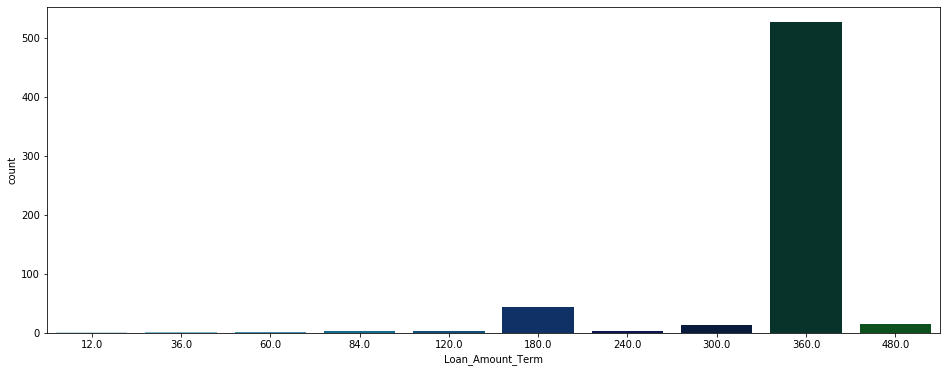

In [114]:
plt.subplots(figsize=(16,6))
sns.countplot(x="Loan_Amount_Term", data=loanData, palette="ocean_r")
plt.show()

# Building Models

In [115]:
loanData.drop(["Loan_ID"], axis=1, inplace=True)

In [116]:
#### Encoding categrical Features: ##########
loanData_dummies = pd.get_dummies(loanData,drop_first=True)
loanData_dummies

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849           0.000000       700.0             360.0   
1               4583        1508.000000       128.0             360.0   
2               3000           0.000000        66.0             360.0   
3               2583        2358.000000       120.0             360.0   
4               6000           0.000000       141.0             360.0   
5               5417        4196.000000       267.0             360.0   
6               2333        1516.000000        95.0             360.0   
7               3036        2504.000000       158.0             360.0   
8               4006        1526.000000       168.0             360.0   
9              12841       10968.000000       349.0             360.0   
10              3200         700.000000        70.0             360.0   
11              2500        1840.000000       109.0             360.0   
12              3073        8106.000000       200.0             360.0   
13              1853        2840.000000       114.0             360.0   
14              1299        1086.000000        17.0             120.0   
15              4950           0.000000       125.0             360.0   
16              3596           0.000000       100.0             240.0   
17              3510           0.000000        76.0             360.0   
18              4887           0.000000       133.0             360.0   
19              2600        3500.000000       115.0             360.0   
20              7660           0.000000       104.0             360.0   
21              5955        5625.000000       315.0             360.0   
22              2600        1911.000000       116.0             360.0   
23              3365        1917.000000       112.0             360.0   
24              3717        2925.000000       151.0             360.0   
25              9560           0.000000       191.0             360.0   
26              2799        2253.000000       122.0             360.0   
27              4226        1040.000000       110.0             360.0   
28              1442           0.000000        35.0             360.0   
29              3750        2083.000000       120.0             360.0   
30              4166        3369.000000       201.0             360.0   
31              3167           0.000000        74.0             360.0   
32              4692           0.000000       106.0             360.0   
33              3500        1667.000000       114.0             360.0   
34             12500        3000.000000       320.0             360.0   
35              2275        2067.000000        89.0             360.0   
36              1828        1330.000000       100.0             360.0   
37              3667        1459.000000       144.0             360.0   
38              4166        7210.000000       184.0             360.0   
39              3748        1668.000000       110.0             360.0   
40              3600           0.000000        80.0             360.0   
41              1800        1213.000000        47.0             360.0   
42              2400           0.000000        75.0             360.0   
43              3941        2336.000000       134.0             360.0   
44              4695           0.000000        96.0             360.0   
45              3410           0.000000        88.0             360.0   
46              5649           0.000000        44.0             360.0   
47              5821           0.000000       144.0             360.0   
48              2645        3440.000000       120.0             360.0   
49              4000        2275.000000       144.0             360.0   
50              1928        1644.000000       100.0             360.0   
51              3086           0.000000       120.0             360.0   
52              4230           0.000000       112.0             360.0   
53              4616           0.000000       134.0            

## 1. Logistic Regression

### Spliting Dataset

In [117]:
x = loanData_dummies.drop(['Loan_Status_Y'], axis = 1)
y = loanData_dummies['Loan_Status_Y']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

### Fitting Model

In [119]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(solver='newton-cg')
modelLR.fit(x_train, y_train)
print(modelLR.coef_)
print(modelLR.intercept_)

m = modelLR.coef_[0][0]
c = modelLR.intercept_[0]

[[ 8.26085600e-06 -4.58056713e-05 -1.05956181e-03 -1.15088284e-03
   3.58546583e+00  3.38474019e-02  3.47762655e-01 -7.48662582e-02
   1.34799556e-01  4.58759205e-01 -4.34465112e-01 -5.16632033e-02
   7.72247541e-01  2.47299880e-01]]
[-2.18609748]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


### Predict

In [120]:

y_pred = modelLR.predict(x_test) 

In [121]:
# trying to predict using model
coba = x_test.iloc[:1]
modelLR.predict(coba)
# coba

array([1], dtype=uint8)

### Evaluation Matrix

In [122]:
confusion_matrix(y_test, y_pred) 

array([[17, 16],
       [ 2, 88]])

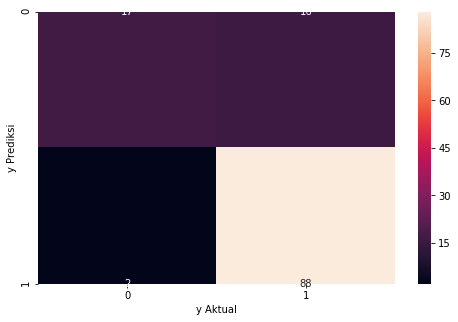

In [123]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.show()

In [124]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.52      0.65        33
           1       0.85      0.98      0.91        90

    accuracy                           0.85       123
   macro avg       0.87      0.75      0.78       123
weighted avg       0.86      0.85      0.84       123



In [125]:
modelLR.score(x_test, y_test)

0.8536585365853658

In [126]:
accuracies = {}
acc = modelLR.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Logistic Regression Algorithm Accuracy Score : {:.2f}%".format(acc))

Logistic Regression Algorithm Accuracy Score : 85.37%


## 2. Decision Tree Classifier

### Fitting Model

In [127]:
from sklearn.tree import DecisionTreeClassifier

modelTC = DecisionTreeClassifier(min_samples_split= 2, 
                                 min_samples_leaf = 1, 
                                 max_depth = 40)
modelTC.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predict

In [128]:
y_pred = modelTC.predict(x_test) 

In [129]:
# trying to predict using model
coba = x_test.iloc[:1]
modelTC.predict(coba)
# coba

array([1], dtype=uint8)

### Eveluation Matrix

In [130]:
confusion_matrix(y_test, y_pred) 

array([[22, 11],
       [18, 72]])

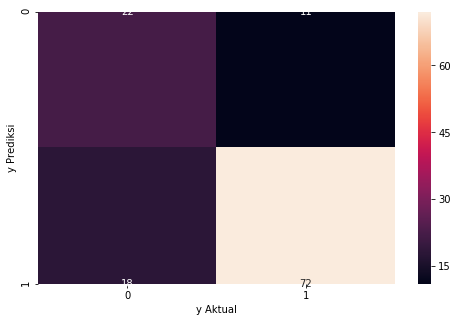

In [131]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.show()

In [132]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60        33
           1       0.87      0.80      0.83        90

    accuracy                           0.76       123
   macro avg       0.71      0.73      0.72       123
weighted avg       0.78      0.76      0.77       123



In [133]:
modelTC.score(x_test, y_test)

0.7642276422764228

In [134]:
accuracies = {}
acc = modelTC.score(x_test,y_test)*100
accuracies['Decision Tree Classifier'] = acc
print("Decision Tree Classifier Algorithm Accuracy Score : {:.2f}%".format(acc))

Decision Tree Classifier Algorithm Accuracy Score : 76.42%


## 3. Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators = 3000, 
                                 max_depth = 25)
modelRF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predict

In [136]:
y_pred = modelRF.predict(x_test) 

In [137]:
# trying to predict using model
coba = x_test.iloc[:1]
modelRF.predict(coba)

array([1], dtype=uint8)

### Evaluating Model

In [138]:
confusion_matrix(y_test, y_pred) 

array([[18, 15],
       [ 6, 84]])

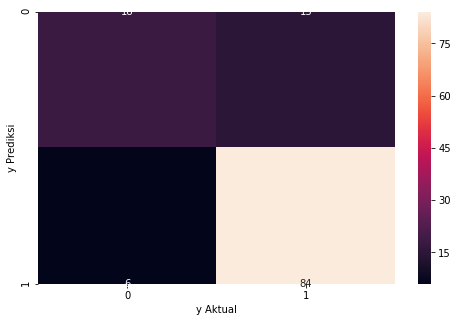

In [139]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.show()

In [140]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        33
           1       0.85      0.93      0.89        90

    accuracy                           0.83       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.82      0.83      0.82       123



In [141]:
modelRF.score(x_test, y_test)

0.8292682926829268

In [142]:
accuracies = {}
acc = modelRF.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 82.93%


## 4. K-Nearest Neighbors Classifier

### Fitting Model

In [143]:
from sklearn.neighbors import KNeighborsClassifier

# k-value
k = round(len(x_train)**0.5)+1
k

23

In [144]:
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

### Prediction

In [145]:

y_pred = knn.predict(x_test) 

In [146]:
# trying to predict using model
coba = x_test.iloc[:1]
knn.predict(coba)
# coba

array([1], dtype=uint8)

### Evaluating Model

In [147]:
confusion_matrix(y_test, y_pred) 

array([[ 0, 33],
       [ 3, 87]])

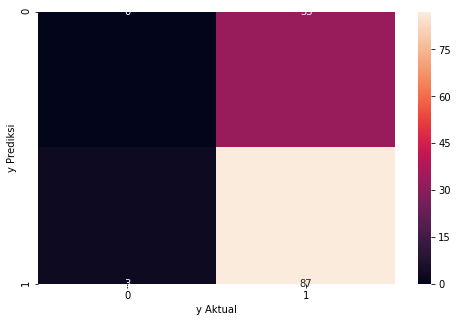

In [148]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
plt.show()

In [149]:
# Confusion Matrix Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.72      0.97      0.83        90

    accuracy                           0.71       123
   macro avg       0.36      0.48      0.41       123
weighted avg       0.53      0.71      0.61       123



In [150]:
knn.score(x_test, y_test)

0.7073170731707317

In [151]:
accuracies = {}
acc = knn.score(x_test,y_test)*100
accuracies['k-Nearest Neigtbors'] = acc
print("k-Nearest Neigtbors Algorithm Accuracy Score : {:.2f}%".format(acc))

k-Nearest Neigtbors Algorithm Accuracy Score : 70.73%


# Clustering

### Kmeans Clustering

In [152]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

### Visualization

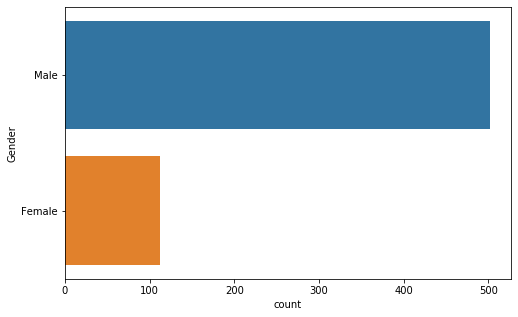

In [153]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Gender' , data = loanData)
plt.show()

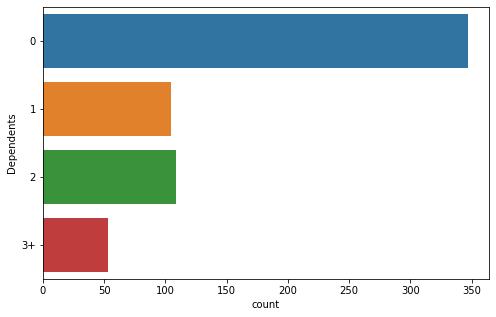

In [154]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Dependents' , data = loanData)
plt.show()

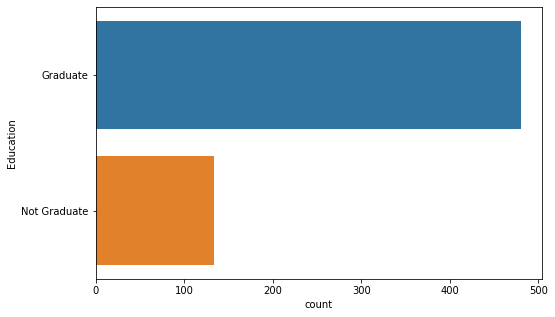

In [155]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Education' , data = loanData)
plt.show()

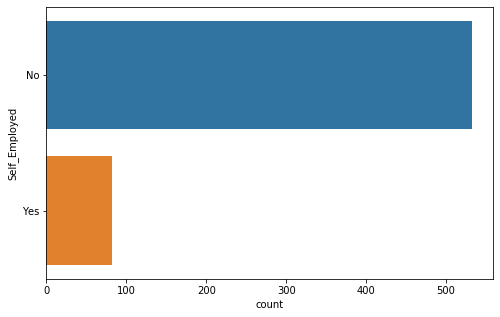

In [156]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Self_Employed' , data = loanData)
plt.show()

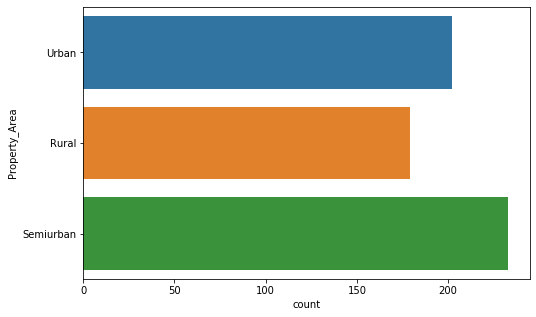

In [157]:
plt.figure(1 , figsize = (8 , 5))
sns.countplot(y = 'Property_Area' , data = loanData)
plt.show()

## **Count Best k value for Training KMeans Model**

In [158]:
loanData['Dependets_clusters'] = [0 if each == "0" else 1 for each in loanData.Dependents]

In [159]:
loanData['Loan_Status_cluster'] = [0 if each == "N" else 1 for each in loanData.Loan_Status]

In [160]:
loanData['Property_Area_cluster'] = [0 if each == "Rural" else 1 if each == "Semiurban" else 2 for each in loanData.Property_Area]

In [214]:
loanData['Education_cluster'] = [0 if each == "Not Graduate" else 1 for each in loanData.Education]

In [227]:
loanData['Self_Employed_cluster'] = [0 if each == "No" else 1 for each in loanData.Self_Employed]

In [215]:
loanData

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
6      Male     Yes          0  Not Graduate            No             2333   
7      Male     Yes         3+      Graduate            No             3036   
8      Male     Yes          2      Graduate            No             4006   
9      Male     Yes          1      Graduate            No            12841   
10     Male     Yes          2      Graduate            No             3200   
11     Male     Yes          2      Graduate            No             2500   
12     Male     Yes          2      Graduate            No             3073   
13     Male      No          0      Graduate            No             1853   
14     Male     Yes          2      Graduate            No             1299   
15     Male      No          0      Graduate            No             4950   
16     Male      No          1  Not Graduate            No             3596   
17   Female      No          0      Graduate            No             3510   
18     Male     Yes          0  Not Graduate            No             4887   
19     Male     Yes          0      Graduate            No             2600   
20     Male     Yes          0  Not Graduate            No             7660   
21     Male     Yes          1      Graduate            No             5955   
22     Male     Yes          0  Not Graduate            No             2600   
23     Male     Yes          2  Not Graduate            No             3365   
24     Male     Yes          1      Graduate            No             3717   
25     Male     Yes          0      Graduate           Yes             9560   
26     Male     Yes          0      Graduate            No             2799   
27     Male     Yes          2  Not Graduate            No             4226   
28     Male      No          0  Not Graduate            No             1442   
29   Female      No          2      Graduate            No             3750   
30     Male     Yes          1      Graduate            No             4166   
31     Male      No          0      Graduate            No             3167   
32     Male      No          1      Graduate           Yes             4692   
33     Male     Yes          0      Graduate            No             3500   
34     Male      No         3+      Graduate            No            12500   
35     Male     Yes          0      Graduate            No             2275   
36     Male     Yes          0      Graduate            No             1828   
37   Female     Yes          0      Graduate            No             3667   
38     Male      No          0      Graduate            No             4166   
39     Male      No          0  Not Graduate            No             3748   
40     Male      No          0      Graduate            No             3600   
41     Male      No          0      Graduate            No             1800   
42     Male     Yes          0      Graduate            No             2400   
43     Male     Yes          0      Graduate            No             3941   
44     Male     Yes          0  Not Graduate           Yes             4695   
45   Female      No          0      Graduate            No             3410   
46     Male     Yes          1      Graduate            No             5649   
47     Male     Yes          0      Graduate            No             5821   
48   Female     Yes          0      Graduate            No             2645   
49   Female      No          0      Graduate           

### PROPERTY AREA CLUSTERING

In [162]:
k = range(1, 15)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(loanData[['Credit_History', 'Property_Area_cluster']])
    inertia.append(model.inertia_)

print(k)
print(inertia)

range(1, 15)
[465.1938110749186, 186.27059502066712, 84.95746244368124, 45.6520614748042, 16.71641791044776, 1.5980653121480888e-27, 1.5963396789179178e-27, 1.5963396789179178e-27, 7.6010089706498e-28, 2.616212125404787e-29, 2.616212125404787e-29, 8.763751618939678e-30, 8.763751618939678e-30, 8.763751618939678e-30]


Text(4, 50, 'Best k value = 4')

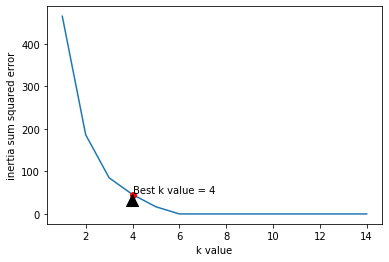

In [163]:
plt.plot(k, inertia) #melihat pada sudut siku dalam plot, mungkin sekitar 4
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.plot(k[3], inertia[3], 'ro')
plt.annotate(
    'Best k value = 4', xy=(k[3], inertia[3]),
    xytext = (4, 50), arrowprops = dict(facecolor='black', shrink=0.1)
)

### **Fitting K-Means Model**

In [164]:
model_KM = KMeans(n_clusters = 4, max_iter = 9000) #tingkatkan iterasi untuk meningkatkan kualitas prediksi 

model_KM.fit(loanData[['Credit_History', 'Property_Area_cluster']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=9000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [165]:
model_KM.labels_ #mengetahui hasil pengelompokan

array([2, 3, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 3, 2, 2, 2, 0, 3, 2, 0, 2,
       0, 3, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 3, 2, 0, 1, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 3, 2, 2, 2, 2, 3, 3, 0, 1,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 0, 1,
       2, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 1, 0, 1, 3, 3, 3, 3, 0, 3, 2, 2,
       1, 1, 1, 1, 3, 2, 0, 3, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 3, 3, 2, 3,
       2, 0, 3, 2, 3, 1, 1, 2, 0, 3, 2, 3, 3, 3, 0, 1, 3, 2, 3, 1, 1, 3,
       3, 0, 1, 0, 0, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 3, 2,
       1, 2, 1, 0, 2, 2, 1, 1, 2, 3, 2, 1, 1, 0, 2, 3, 2, 1, 3, 1, 0, 1,
       0, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 3, 3, 1, 1, 3, 0, 2, 3, 1, 3, 2,
       2, 3, 1, 2, 2, 2, 1, 2, 0, 2, 3, 1, 0, 3, 3, 2, 3, 0, 2, 1, 1, 3,
       1, 3, 1, 0, 3, 2, 2, 2, 3, 1, 1, 1, 1, 2, 1, 3, 0, 1, 2, 2, 3, 3,
       1, 3, 1, 3, 3, 0, 2, 0, 1, 2, 1, 2, 3, 2, 0,

### **Predict Cluster**

In [166]:
loanData['cluster'] = model_KM.predict(loanData[['Credit_History','Property_Area_cluster']])
loanData

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
6      Male     Yes          0  Not Graduate            No             2333   
7      Male     Yes         3+      Graduate            No             3036   
8      Male     Yes          2      Graduate            No             4006   
9      Male     Yes          1      Graduate            No            12841   
10     Male     Yes          2      Graduate            No             3200   
11     Male     Yes          2      Graduate            No             2500   
12     Male     Yes          2      Graduate            No             3073   
13     Male      No          0      Graduate            No             1853   
14     Male     Yes          2      Graduate            No             1299   
15     Male      No          0      Graduate            No             4950   
16     Male      No          1  Not Graduate            No             3596   
17   Female      No          0      Graduate            No             3510   
18     Male     Yes          0  Not Graduate            No             4887   
19     Male     Yes          0      Graduate            No             2600   
20     Male     Yes          0  Not Graduate            No             7660   
21     Male     Yes          1      Graduate            No             5955   
22     Male     Yes          0  Not Graduate            No             2600   
23     Male     Yes          2  Not Graduate            No             3365   
24     Male     Yes          1      Graduate            No             3717   
25     Male     Yes          0      Graduate           Yes             9560   
26     Male     Yes          0      Graduate            No             2799   
27     Male     Yes          2  Not Graduate            No             4226   
28     Male      No          0  Not Graduate            No             1442   
29   Female      No          2      Graduate            No             3750   
30     Male     Yes          1      Graduate            No             4166   
31     Male      No          0      Graduate            No             3167   
32     Male      No          1      Graduate           Yes             4692   
33     Male     Yes          0      Graduate            No             3500   
34     Male      No         3+      Graduate            No            12500   
35     Male     Yes          0      Graduate            No             2275   
36     Male     Yes          0      Graduate            No             1828   
37   Female     Yes          0      Graduate            No             3667   
38     Male      No          0      Graduate            No             4166   
39     Male      No          0  Not Graduate            No             3748   
40     Male      No          0      Graduate            No             3600   
41     Male      No          0      Graduate            No             1800   
42     Male     Yes          0      Graduate            No             2400   
43     Male     Yes          0      Graduate            No             3941   
44     Male     Yes          0  Not Graduate           Yes             4695   
45   Female      No          0      Graduate            No             3410   
46     Male     Yes          1      Graduate            No             5649   
47     Male     Yes          0      Graduate            No             5821   
48   Female     Yes          0      Graduate            No             2645   
49   Female      No          0      Graduate           

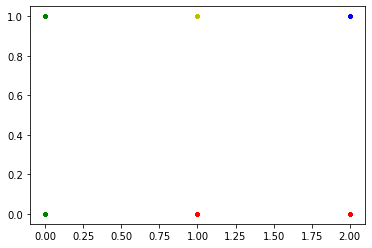

In [167]:
plt.plot(loanData['Property_Area_cluster'][loanData['cluster'] == 0], loanData['Credit_History'][loanData['cluster'] == 0], 'r.')
plt.plot(loanData['Property_Area_cluster'][loanData['cluster'] == 1], loanData['Credit_History'][loanData['cluster'] == 1], 'y.')
plt.plot(loanData['Property_Area_cluster'][loanData['cluster'] == 2], loanData['Credit_History'][loanData['cluster'] == 2], 'b.')
plt.plot(loanData['Property_Area_cluster'][loanData['cluster'] == 3], loanData['Credit_History'][loanData['cluster'] == 3], 'g.')

### DEPENDENT CREDIT HISTORY

In [168]:
k2 = range(1, 15)
inertia2 = []

for i in k2:
    model2 = KMeans(n_clusters = i)
    model2.fit(loanData[['Credit_History', 'Dependets_clusters']])
    inertia2.append(model2.inertia_)

print(k2)
print(inertia2)

range(1, 15)
[235.9495114006515, 84.66804822502131, 25.490196078431374, 9.016803406192606e-28, 8.893543889751823e-28, 8.553840662441024e-28, 5.359785998031902e-28, 5.359785998031902e-28, 5.359785998031902e-28, 5.359785998031902e-28, 0.0, 0.0, 0.0, 0.0]


Text(4, 50, 'Best k value = 4')

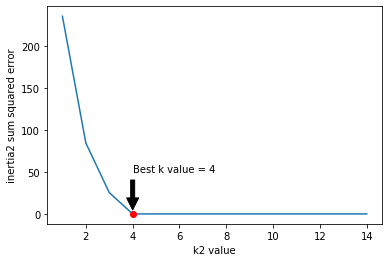

In [169]:
plt.plot(k2, inertia2) #melihat pada sudut siku dalam plot, mungkin sekitar 4
plt.xlabel('k2 value')
plt.ylabel('inertia2 sum squared error')
plt.plot(k2[3], inertia2[3], 'ro')
plt.annotate(
    'Best k value = 4', xy=(k2[3], inertia2[3]),
    xytext = (4, 50), arrowprops = dict(facecolor='black', shrink=0.1)
)

In [170]:
model_KM2 = KMeans(n_clusters = 4, max_iter = 8000) #tingkatkan iterasi untuk meningkatkan kualitas prediksi 

model_KM2.fit(loanData[['Credit_History', 'Dependets_clusters']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=8000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [171]:
model_KM2.labels_ #mengetahui hasil pengelompokan

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 3, 0, 0, 3, 2,
       3, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 3, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 3, 1, 3, 0,
       3, 2, 2, 3, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 3, 2, 0, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2,
       0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 2, 0, 3, 2, 0, 0, 2, 0, 1, 3, 0, 0,
       0, 0, 0, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 3, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 3, 2, 0, 2, 2, 0, 0, 0,
       2, 1, 2, 3, 1, 3, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 2,
       3, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 3, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 3, 2, 0, 2, 3, 2, 3, 2, 0, 1, 2, 0, 2, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 3,

In [172]:
loanData['cluster2'] = model_KM2.predict(loanData[['Credit_History','Dependets_clusters']])
loanData

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
6      Male     Yes          0  Not Graduate            No             2333   
7      Male     Yes         3+      Graduate            No             3036   
8      Male     Yes          2      Graduate            No             4006   
9      Male     Yes          1      Graduate            No            12841   
10     Male     Yes          2      Graduate            No             3200   
11     Male     Yes          2      Graduate            No             2500   
12     Male     Yes          2      Graduate            No             3073   
13     Male      No          0      Graduate            No             1853   
14     Male     Yes          2      Graduate            No             1299   
15     Male      No          0      Graduate            No             4950   
16     Male      No          1  Not Graduate            No             3596   
17   Female      No          0      Graduate            No             3510   
18     Male     Yes          0  Not Graduate            No             4887   
19     Male     Yes          0      Graduate            No             2600   
20     Male     Yes          0  Not Graduate            No             7660   
21     Male     Yes          1      Graduate            No             5955   
22     Male     Yes          0  Not Graduate            No             2600   
23     Male     Yes          2  Not Graduate            No             3365   
24     Male     Yes          1      Graduate            No             3717   
25     Male     Yes          0      Graduate           Yes             9560   
26     Male     Yes          0      Graduate            No             2799   
27     Male     Yes          2  Not Graduate            No             4226   
28     Male      No          0  Not Graduate            No             1442   
29   Female      No          2      Graduate            No             3750   
30     Male     Yes          1      Graduate            No             4166   
31     Male      No          0      Graduate            No             3167   
32     Male      No          1      Graduate           Yes             4692   
33     Male     Yes          0      Graduate            No             3500   
34     Male      No         3+      Graduate            No            12500   
35     Male     Yes          0      Graduate            No             2275   
36     Male     Yes          0      Graduate            No             1828   
37   Female     Yes          0      Graduate            No             3667   
38     Male      No          0      Graduate            No             4166   
39     Male      No          0  Not Graduate            No             3748   
40     Male      No          0      Graduate            No             3600   
41     Male      No          0      Graduate            No             1800   
42     Male     Yes          0      Graduate            No             2400   
43     Male     Yes          0      Graduate            No             3941   
44     Male     Yes          0  Not Graduate           Yes             4695   
45   Female      No          0      Graduate            No             3410   
46     Male     Yes          1      Graduate            No             5649   
47     Male     Yes          0      Graduate            No             5821   
48   Female     Yes          0      Graduate            No             2645   
49   Female      No          0      Graduate           

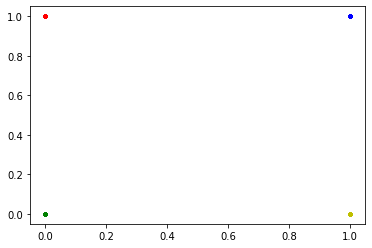

In [173]:
plt.plot(loanData['Dependets_clusters'][loanData['cluster2'] == 0], loanData['Credit_History'][loanData['cluster2'] == 0], 'r.')
plt.plot(loanData['Dependets_clusters'][loanData['cluster2'] == 1], loanData['Credit_History'][loanData['cluster2'] == 1], 'y.')
plt.plot(loanData['Dependets_clusters'][loanData['cluster2'] == 2], loanData['Credit_History'][loanData['cluster2'] == 2], 'b.')
plt.plot(loanData['Dependets_clusters'][loanData['cluster2'] == 3], loanData['Credit_History'][loanData['cluster2'] == 3], 'g.')

### INCOME CLUSTERING

In [193]:
k3 = range(1, 15)
inertia3 = []

for i in k3:
    model3 = KMeans(n_clusters = i)
    model3.fit(loanData[['ApplicantIncome', 'LoanAmount']])
    inertia3.append(model3.inertia_)

print(k3)
print(inertia3)

range(1, 15)
[22883881498.482082, 9087240627.5566, 4137695474.439082, 2704514466.367654, 1444887226.80903, 960755232.6745383, 712174185.4519258, 535758893.57789636, 407418771.6207855, 330213909.0075399, 263291816.31585202, 204764952.85837454, 171724612.78417677, 145967286.97520798]


Text(4, 50, 'Best k value = 4')

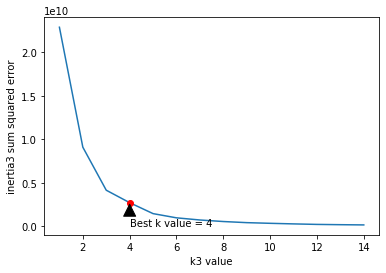

In [194]:
plt.plot(k3, inertia3) #melihat pada sudut siku dalam plot, mungkin sekitar 4
plt.xlabel('k3 value')
plt.ylabel('inertia3 sum squared error')
plt.plot(k3[3], inertia3[3], 'ro')
plt.annotate(
    'Best k value = 4', xy=(k3[3], inertia3[3]),
    xytext = (4, 50), arrowprops = dict(facecolor='black', shrink=0.1)
)

In [334]:
model_KM3 = KMeans(n_clusters = 4, max_iter = 5000) #tingkatkan iterasi untuk meningkatkan kualitas prediksi 

model_KM3.fit(loanData[['ApplicantIncome', 'CoapplicantIncome']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=5000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [335]:
model_KM3.labels_ #mengetahui hasil pengelompokan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [336]:
loanData['cluster3'] = model_KM3.predict(loanData[['ApplicantIncome','CoapplicantIncome']])
loanData

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
6      Male     Yes          0  Not Graduate            No             2333   
7      Male     Yes         3+      Graduate            No             3036   
8      Male     Yes          2      Graduate            No             4006   
9      Male     Yes          1      Graduate            No            12841   
10     Male     Yes          2      Graduate            No             3200   
11     Male     Yes          2      Graduate            No             2500   
12     Male     Yes          2      Graduate            No             3073   
13     Male      No          0      Graduate            No             1853   
14     Male     Yes          2      Graduate            No             1299   
15     Male      No          0      Graduate            No             4950   
16     Male      No          1  Not Graduate            No             3596   
17   Female      No          0      Graduate            No             3510   
18     Male     Yes          0  Not Graduate            No             4887   
19     Male     Yes          0      Graduate            No             2600   
20     Male     Yes          0  Not Graduate            No             7660   
21     Male     Yes          1      Graduate            No             5955   
22     Male     Yes          0  Not Graduate            No             2600   
23     Male     Yes          2  Not Graduate            No             3365   
24     Male     Yes          1      Graduate            No             3717   
25     Male     Yes          0      Graduate           Yes             9560   
26     Male     Yes          0      Graduate            No             2799   
27     Male     Yes          2  Not Graduate            No             4226   
28     Male      No          0  Not Graduate            No             1442   
29   Female      No          2      Graduate            No             3750   
30     Male     Yes          1      Graduate            No             4166   
31     Male      No          0      Graduate            No             3167   
32     Male      No          1      Graduate           Yes             4692   
33     Male     Yes          0      Graduate            No             3500   
34     Male      No         3+      Graduate            No            12500   
35     Male     Yes          0      Graduate            No             2275   
36     Male     Yes          0      Graduate            No             1828   
37   Female     Yes          0      Graduate            No             3667   
38     Male      No          0      Graduate            No             4166   
39     Male      No          0  Not Graduate            No             3748   
40     Male      No          0      Graduate            No             3600   
41     Male      No          0      Graduate            No             1800   
42     Male     Yes          0      Graduate            No             2400   
43     Male     Yes          0      Graduate            No             3941   
44     Male     Yes          0  Not Graduate           Yes             4695   
45   Female      No          0      Graduate            No             3410   
46     Male     Yes          1      Graduate            No             5649   
47     Male     Yes          0      Graduate            No             5821   
48   Female     Yes          0      Graduate            No             2645   
49   Female      No          0      Graduate           

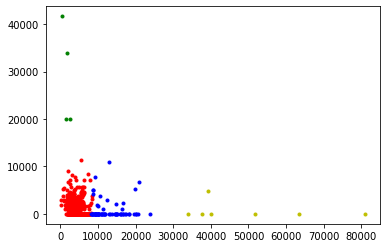

In [337]:
plt.plot(loanData['ApplicantIncome'][loanData['cluster3'] == 0], loanData['CoapplicantIncome'][loanData['cluster3'] == 0], 'r.')
plt.plot(loanData['ApplicantIncome'][loanData['cluster3'] == 1], loanData['CoapplicantIncome'][loanData['cluster3'] == 1], 'y.')
plt.plot(loanData['ApplicantIncome'][loanData['cluster3'] == 2], loanData['CoapplicantIncome'][loanData['cluster3'] == 2], 'b.')
plt.plot(loanData['ApplicantIncome'][loanData['cluster3'] == 3], loanData['CoapplicantIncome'][loanData['cluster3'] == 3], 'g.')

### Education Clustering

In [275]:
k4 = range(1, 15)
inertia4 = []

for i in k4:
    model4 = KMeans(n_clusters = i)
    model4.fit(loanData[['Education_cluster', 'Credit_History']])
    inertia4.append(model4.inertia_)

print(k4)
print(inertia4)

range(1, 15)
[189.81107491856676, 84.6217972636816, 20.754901960784316, 1.3682907956855113e-27, 1.3682907956855113e-27, 1.3682907956855113e-27, 1.3682907956855113e-27, 1.3682907956855113e-27, 1.3682907956855113e-27, 1.3682907956855113e-27, 1.3682907956855113e-27, 1.3682907956855113e-27, 1.3682907956855113e-27, 1.3682907956855113e-27]


Text(4, 50, 'Best k value = 4')

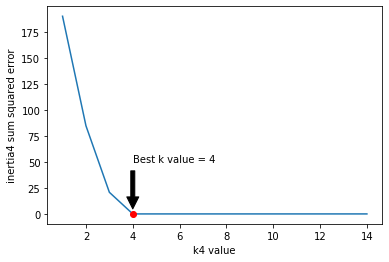

In [276]:
plt.plot(k4, inertia4) #melihat pada sudut siku dalam plot, mungkin sekitar 4
plt.xlabel('k4 value')
plt.ylabel('inertia4 sum squared error')
plt.plot(k4[3], inertia4[3], 'ro')
plt.annotate(
    'Best k value = 4', xy=(k4[3], inertia4[3]),
    xytext = (4, 50), arrowprops = dict(facecolor='black', shrink=0.1)
)

In [277]:
model_KM4 = KMeans(n_clusters = 4, max_iter = 9000) #tingkatkan iterasi untuk meningkatkan kualitas prediksi 

model_KM4.fit(loanData[['Education_cluster', 'Credit_History']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=9000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [278]:
model_KM4.labels_

array([0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 3, 0,
       3, 3, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 2, 2, 0,
       3, 0, 1, 2, 0, 1, 0, 3, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 0, 3, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 3,

In [279]:
loanData['cluster4'] = model_KM4.predict(loanData[['Education_cluster','Credit_History']])
loanData

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
6      Male     Yes          0  Not Graduate            No             2333   
7      Male     Yes         3+      Graduate            No             3036   
8      Male     Yes          2      Graduate            No             4006   
9      Male     Yes          1      Graduate            No            12841   
10     Male     Yes          2      Graduate            No             3200   
11     Male     Yes          2      Graduate            No             2500   
12     Male     Yes          2      Graduate            No             3073   
13     Male      No          0      Graduate            No             1853   
14     Male     Yes          2      Graduate            No             1299   
15     Male      No          0      Graduate            No             4950   
16     Male      No          1  Not Graduate            No             3596   
17   Female      No          0      Graduate            No             3510   
18     Male     Yes          0  Not Graduate            No             4887   
19     Male     Yes          0      Graduate            No             2600   
20     Male     Yes          0  Not Graduate            No             7660   
21     Male     Yes          1      Graduate            No             5955   
22     Male     Yes          0  Not Graduate            No             2600   
23     Male     Yes          2  Not Graduate            No             3365   
24     Male     Yes          1      Graduate            No             3717   
25     Male     Yes          0      Graduate           Yes             9560   
26     Male     Yes          0      Graduate            No             2799   
27     Male     Yes          2  Not Graduate            No             4226   
28     Male      No          0  Not Graduate            No             1442   
29   Female      No          2      Graduate            No             3750   
30     Male     Yes          1      Graduate            No             4166   
31     Male      No          0      Graduate            No             3167   
32     Male      No          1      Graduate           Yes             4692   
33     Male     Yes          0      Graduate            No             3500   
34     Male      No         3+      Graduate            No            12500   
35     Male     Yes          0      Graduate            No             2275   
36     Male     Yes          0      Graduate            No             1828   
37   Female     Yes          0      Graduate            No             3667   
38     Male      No          0      Graduate            No             4166   
39     Male      No          0  Not Graduate            No             3748   
40     Male      No          0      Graduate            No             3600   
41     Male      No          0      Graduate            No             1800   
42     Male     Yes          0      Graduate            No             2400   
43     Male     Yes          0      Graduate            No             3941   
44     Male     Yes          0  Not Graduate           Yes             4695   
45   Female      No          0      Graduate            No             3410   
46     Male     Yes          1      Graduate            No             5649   
47     Male     Yes          0      Graduate            No             5821   
48   Female     Yes          0      Graduate            No             2645   
49   Female      No          0      Graduate           

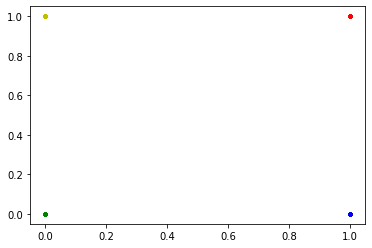

In [280]:
plt.plot(loanData['Education_cluster'][loanData['cluster4'] == 0], loanData['Credit_History'][loanData['cluster4'] == 0], 'r.')
plt.plot(loanData['Education_cluster'][loanData['cluster4'] == 1], loanData['Credit_History'][loanData['cluster4'] == 1], 'y.')
plt.plot(loanData['Education_cluster'][loanData['cluster4'] == 2], loanData['Credit_History'][loanData['cluster4'] == 2], 'b.')
plt.plot(loanData['Education_cluster'][loanData['cluster4'] == 3], loanData['Credit_History'][loanData['cluster4'] == 3], 'g.')

### SELF EMPLOYED

In [301]:
k5 = range(1, 15)
inertia5 = []

for i in k5:
    model5 = KMeans(n_clusters = i)
    model5.fit(loanData[['Self_Employed_cluster', 'Credit_History']])
    inertia5.append(model5.inertia_)

print(k5)
print(inertia5)

range(1, 15)
[156.1042345276873, 71.04430912990196, 10.939024390243901, 4.4088696435703705e-28, 4.4088696435703705e-28, 4.3434727663787575e-28, 4.3434727663787575e-28, 4.3434727663787575e-28, 4.3434727663787575e-28, 4.3434727663787575e-28, 4.3434727663787575e-28, 4.3434727663787575e-28, 4.3434727663787575e-28, 4.3434727663787575e-28]


Text(4, 50, 'Best k value = 4')

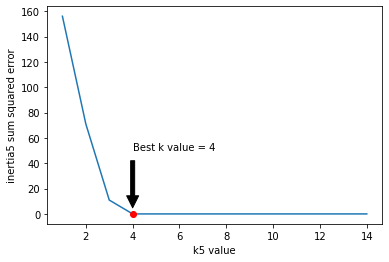

In [302]:
plt.plot(k5, inertia5) #melihat pada sudut siku dalam plot, mungkin sekitar 4
plt.xlabel('k5 value')
plt.ylabel('inertia5 sum squared error')
plt.plot(k5[3], inertia5[3], 'ro')
plt.annotate(
    'Best k value = 4', xy=(k5[3], inertia5[3]),
    xytext = (4, 50), arrowprops = dict(facecolor='black', shrink=0.1)
)

In [303]:
model_KM5 = KMeans(n_clusters = 4, max_iter = 9000) #tingkatkan iterasi untuk meningkatkan kualitas prediksi 

model_KM5.fit(loanData[['Self_Employed_cluster', 'Credit_History']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=9000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [304]:
model_KM5.labels_

array([0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0,
       1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 2, 0,
       0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [305]:
loanData['cluster5'] = model_KM5.predict(loanData[['Self_Employed_cluster','Credit_History']])
loanData

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
6      Male     Yes          0  Not Graduate            No             2333   
7      Male     Yes         3+      Graduate            No             3036   
8      Male     Yes          2      Graduate            No             4006   
9      Male     Yes          1      Graduate            No            12841   
10     Male     Yes          2      Graduate            No             3200   
11     Male     Yes          2      Graduate            No             2500   
12     Male     Yes          2      Graduate            No             3073   
13     Male      No          0      Graduate            No             1853   
14     Male     Yes          2      Graduate            No             1299   
15     Male      No          0      Graduate            No             4950   
16     Male      No          1  Not Graduate            No             3596   
17   Female      No          0      Graduate            No             3510   
18     Male     Yes          0  Not Graduate            No             4887   
19     Male     Yes          0      Graduate            No             2600   
20     Male     Yes          0  Not Graduate            No             7660   
21     Male     Yes          1      Graduate            No             5955   
22     Male     Yes          0  Not Graduate            No             2600   
23     Male     Yes          2  Not Graduate            No             3365   
24     Male     Yes          1      Graduate            No             3717   
25     Male     Yes          0      Graduate           Yes             9560   
26     Male     Yes          0      Graduate            No             2799   
27     Male     Yes          2  Not Graduate            No             4226   
28     Male      No          0  Not Graduate            No             1442   
29   Female      No          2      Graduate            No             3750   
30     Male     Yes          1      Graduate            No             4166   
31     Male      No          0      Graduate            No             3167   
32     Male      No          1      Graduate           Yes             4692   
33     Male     Yes          0      Graduate            No             3500   
34     Male      No         3+      Graduate            No            12500   
35     Male     Yes          0      Graduate            No             2275   
36     Male     Yes          0      Graduate            No             1828   
37   Female     Yes          0      Graduate            No             3667   
38     Male      No          0      Graduate            No             4166   
39     Male      No          0  Not Graduate            No             3748   
40     Male      No          0      Graduate            No             3600   
41     Male      No          0      Graduate            No             1800   
42     Male     Yes          0      Graduate            No             2400   
43     Male     Yes          0      Graduate            No             3941   
44     Male     Yes          0  Not Graduate           Yes             4695   
45   Female      No          0      Graduate            No             3410   
46     Male     Yes          1      Graduate            No             5649   
47     Male     Yes          0      Graduate            No             5821   
48   Female     Yes          0      Graduate            No             2645   
49   Female      No          0      Graduate           

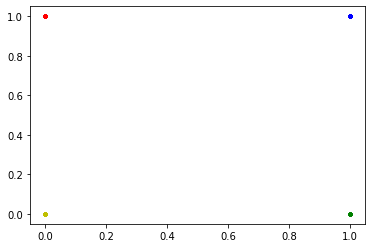

In [306]:
plt.plot(loanData['Self_Employed_cluster'][loanData['cluster5'] == 0], loanData['Credit_History'][loanData['cluster5'] == 0], 'r.')
plt.plot(loanData['Self_Employed_cluster'][loanData['cluster5'] == 1], loanData['Credit_History'][loanData['cluster5'] == 1], 'y.')
plt.plot(loanData['Self_Employed_cluster'][loanData['cluster5'] == 2], loanData['Credit_History'][loanData['cluster5'] == 2], 'b.')
plt.plot(loanData['Self_Employed_cluster'][loanData['cluster5'] == 3], loanData['Credit_History'][loanData['cluster5'] == 3], 'g.')